Reference:

* https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37?gi=b9fc6d293b7

* https://www.tensorflow.org/tutorials

In [1]:
import tensorflow as tf
from distutils.version import LooseVersion

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.12'), 'Please use TensorFlow version 1.12 or newer'
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.13.1
Default GPU Device: /device:GPU:0


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
# Load mnist data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train[0,10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
        90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [5]:
# convert the values from RGB integer to 0-1 range for better training
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
x_train[0,10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05490196,
       0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.layers import Dense, Flatten, Dropout

# use a FFT model from kera 
model = Sequential()

In [8]:
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=512, activation=tf.nn.relu))
model.add(Dropout(rate=0.2))
model.add(Dense(units=10, activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
layers = model.layers
# display object attributes
# dir(layers[0])

In [11]:
print("Model:")
print("input_shape, output_shape")
for layer in layers:
    print(layer.input_shape,',',layer.output_shape)

Model:
input_shape, output_shape
(None, 28, 28) , (None, 784)
(None, 784) , (None, 512)
(None, 512) , (None, 512)
(None, 512) , (None, 10)


In [12]:
# use model summary function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
loss, accuracy = model.evaluate(x_test, y_test)
print("validation accuracy: ", accuracy)

Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2010 - acc: 0.9414
Epoch 2/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0795 - acc: 0.9760
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0522 - acc: 0.9835
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0381 - acc: 0.9882
Epoch 5/5
10000/10000 [==============================] - 0s 32us/sample - loss: 0.0609 - acc: 0.9816
validation accuracy:  0.9816


In [14]:
test_list = list([1,2])

def max_list_index(l):
    '''
    this function returns the index and value of the max element from the given list.
    example: 
        test_list = [4, 3, 10]
        idx, value = max_list_index(test_list)
    
    idx = 2 # since the max element 10 has index 2
    value = 10 # 10 is the max element from the given list
    '''
    # print(test_list)
    # l.__getitem__(1)
    idx = max(range(len(l)), key=l.__getitem__ )
    return idx, l[idx]

idx, value = max_list_index(test_list)
print("index of max element is:", idx)
print("value of max element is:", value)


index of max element is: 1
value of max element is: 2


(1, 28, 28)


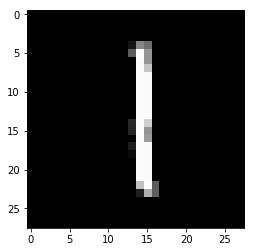

In [15]:
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

# make slice so that it is a patch with one number
# test_images = x_test[0:1]
x_test_number = x_test.shape[0]
image_index = np.random.randint(0, x_test_number)

test_images = x_test[image_index:image_index + 1]
test_images = (test_images * 255) #.astype(np.uint8)

# print(test_images)
print(test_images.shape)
# show the first image from the batch test_images
plt.imshow(test_images[0], cmap="gray", interpolation='nearest')


In [16]:
# Make prediction
pred_prob = model.predict(test_images)
print(pred_prob.tolist()[0])


number, confidence = max_list_index(pred_prob.tolist()[0])

print("Predict as: ", number, " with conficdence: ", confidence)

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Predict as:  1  with conficdence:  1.0
